In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as normal

In [2]:
## Cross Entropy Parameters

n=50000
np.random.seed(123)
B=5
m=2

n_1=n/2

low = np.array([0, 0])
upp = np.array([B, B])
mu = np.array([0, 0])
S = np.eye(2)

## Define a mesh grid of the state space

x1_grid = np.linspace(0, 5.05, 200)
x2_grid = np.linspace(0, 5.05, 200)
x1s, x2s = np.meshgrid(x1_grid, x2_grid)
xs = np.array([x1s.reshape(-1), x2s.reshape(-1)]).transpose()

In [3]:
'''
Supporting functions for the Cross Entropy (CE) method
'''

def R(x, t):
    y_out = np.logical_or(np.sqrt(np.sum((x-5)**2,1))<=1+t/1.5, x[:,1]>=5-t)
    return y_out

def ok_flag(samples, B):
    flag = np.logical_and(samples>0,  samples<B).all(axis=1)
    return flag

def ce_iter(mu_it, t_it, mu_0, S, N, B):
    temp_saples=normal(mu_it,S).rvs(10*N)
    ok_samples=temp_saples[ok_flag(temp_saples, B),:]

    stage2_samples=ok_samples[1:N,:]
    in_rare_ind=R(stage2_samples,t_it)

    #CE
    c_it=np.divide(np.multiply(in_rare_ind, normal(mu_0, S).pdf(stage2_samples)), normal(mu_it, S).pdf(stage2_samples))
    a_it = np.multiply(np.tile(c_it, (2, 1)).transpose(), stage2_samples).sum(axis=0)/c_it.sum()
    
    plot_ce_iter(stage2_samples, in_rare_ind, a_it, t_it, mu_it, mu_0, S)
    
    return a_it
    
def plot_ce_iter(stage2_samples, in_rare_ind, a_it, t_it, mu_it, mu_0, S):
    ys = (R(xs, t_it)).reshape(x1s.shape)
    
    plt.figure(figsize=[5, 5])
    plt.rcParams["font.size"] = 24
    
    plt.contour(x1s, x2s, normal(mu_it, S).pdf(xs).reshape(x1s.shape), cmap="coolwarm",  alpha=0.3)    
    
    plt.contourf(x1s, x2s, ys, levels=[-100, 0, 100], cmap="coolwarm")
    
    plt.scatter(stage2_samples[~in_rare_ind,0], stage2_samples[~in_rare_ind,1], c='C0', s=8, alpha=0.8)
    plt.scatter(stage2_samples[in_rare_ind,0],stage2_samples[in_rare_ind,1], c='C3', s=8, alpha=0.8)
    
    plt.scatter(mu_it[0],mu_it[1],marker='x', c="k", alpha=0.5, s=30)    
    plt.plot([mu_it[0], a_it[0]], [mu_it[1], a_it[1]], alpha=0.3, c="k", linestyle="dashed")
    
    plt.scatter(a_it[0],a_it[1],marker='x', c="k", s=50)
    plt.text(2,4.3,r"$\{x:g(x) > \tilde \gamma\}$")
    plt.text(a_it[0]+0.3,a_it[1]-0.2, r"$\theta^*_{k+1}$") 

    plt.xlim([0, 5])
    plt.ylim([0, 5])
    plt.show()

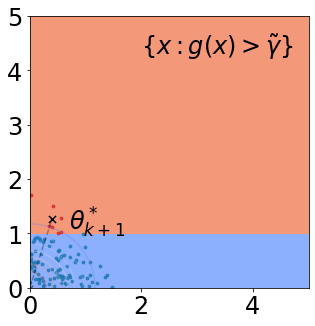

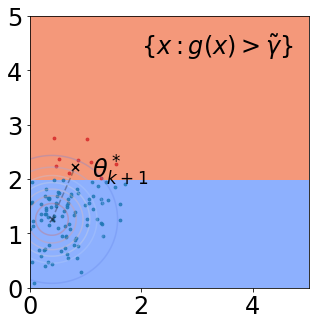

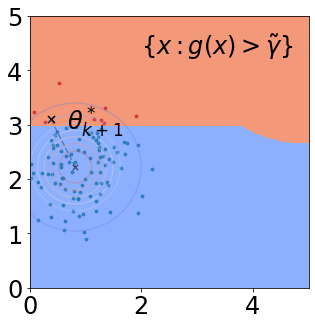

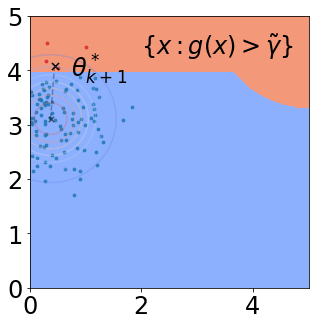

In [4]:
N_explore = 100
Sigma_mat = np.eye(2)/3

a_it = mu

for tnow in range(4):
    t_it = 4 - tnow
    a_now = ce_iter(mu_it=a_it, t_it=t_it, mu_0=mu, S=Sigma_mat, N=N_explore, B=B)    
    a_it = a_now